In [1]:
import numpy as np # used for handling numbers

In [2]:
import pandas as pd # used for handling the dataset

In [3]:
from sklearn.impute import SimpleImputer # used for handling missing data

In [4]:
from matplotlib import pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split # used for splitting training and testing data

In [6]:
from sklearn.preprocessing import StandardScaler # used for feature scaling

In [7]:
import seaborn as sns

In [106]:
from scipy import stats

In [33]:
dataset = pd.read_csv('diamonds.csv') # to import the dataset

In [34]:
dataset

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [35]:
# dataset.drop(columns=['Unnamed:0'],inplace=True)
list(dataset.columns)
dataset.drop(columns='Unnamed: 0',inplace=True)

In [36]:
dataset.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [12]:
dataset.isnull().sum() #find null data

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

# Melihat korelasi pada dataset

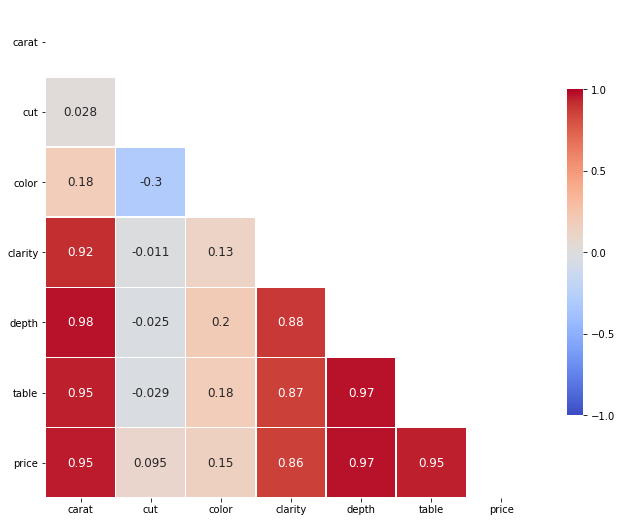

In [105]:
mask = np.zeros_like(dataset.corr(), dtype=np.bool)
Triu = np.triu_indices_from(mask)
mask[Triu] = True

f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(dataset.corr(), 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(dataset.columns, rotation = 0)
ax.set_xticklabels(dataset.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

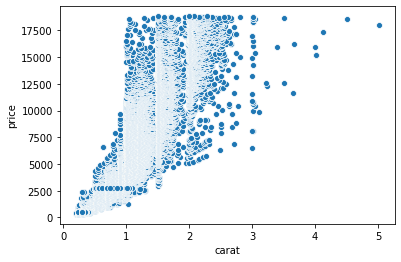

In [82]:
#persebaran data carat & price
sns.scatterplot(x='carat',y='price',data=dataset)

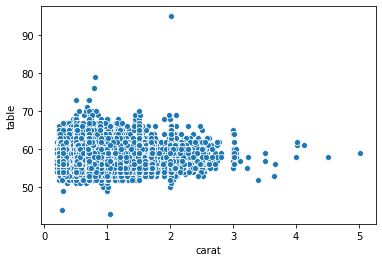

In [65]:
#persebaran data carat & table
sns.scatterplot(x='carat',y='table',data=dataset)

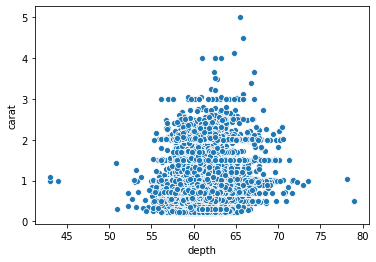

In [67]:
#persebaran data carat & depth
sns.scatterplot(x='depth',y='carat',data=dataset)

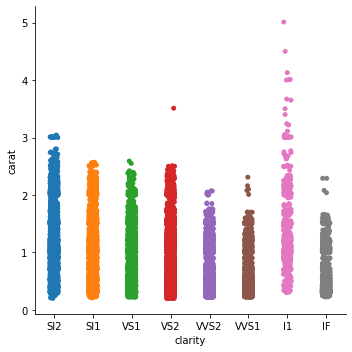

In [87]:
sns.catplot(x='clarity',y='carat',data=dataset)

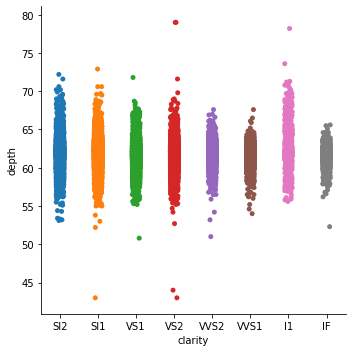

In [89]:
#persebaran data clarity & depth
sns.catplot(x='clarity',y='depth',data=dataset)

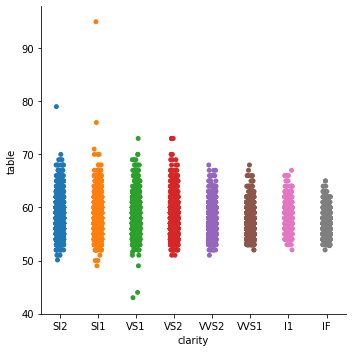

In [90]:
#persebaran data clarity & table
sns.catplot(x='clarity',y='table',data=dataset)

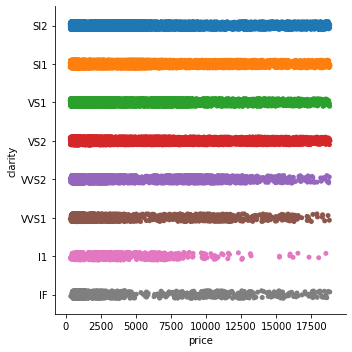

In [92]:
#persebaran data clarity & price
sns.catplot(x='price',y='clarity',data=dataset)

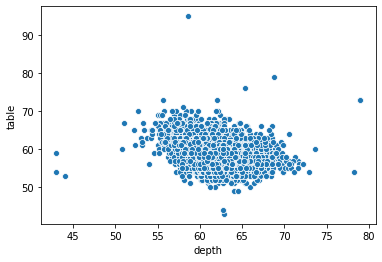

In [97]:
#persebaran data depth & table
sns.scatterplot(x='depth',y='table',data=dataset)

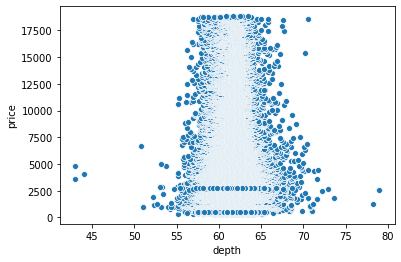

In [98]:
#persebaran data depth & price
sns.scatterplot(x='depth',y='price',data=dataset)

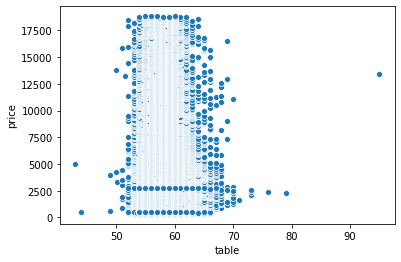

In [99]:
#persebaran data table & price
sns.scatterplot(x='table',y='price',data=dataset)

In [39]:
# Get dummies
datasetnew = pd.get_dummies(dataset, prefix_sep='_', drop_first=True)
datasetnew

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


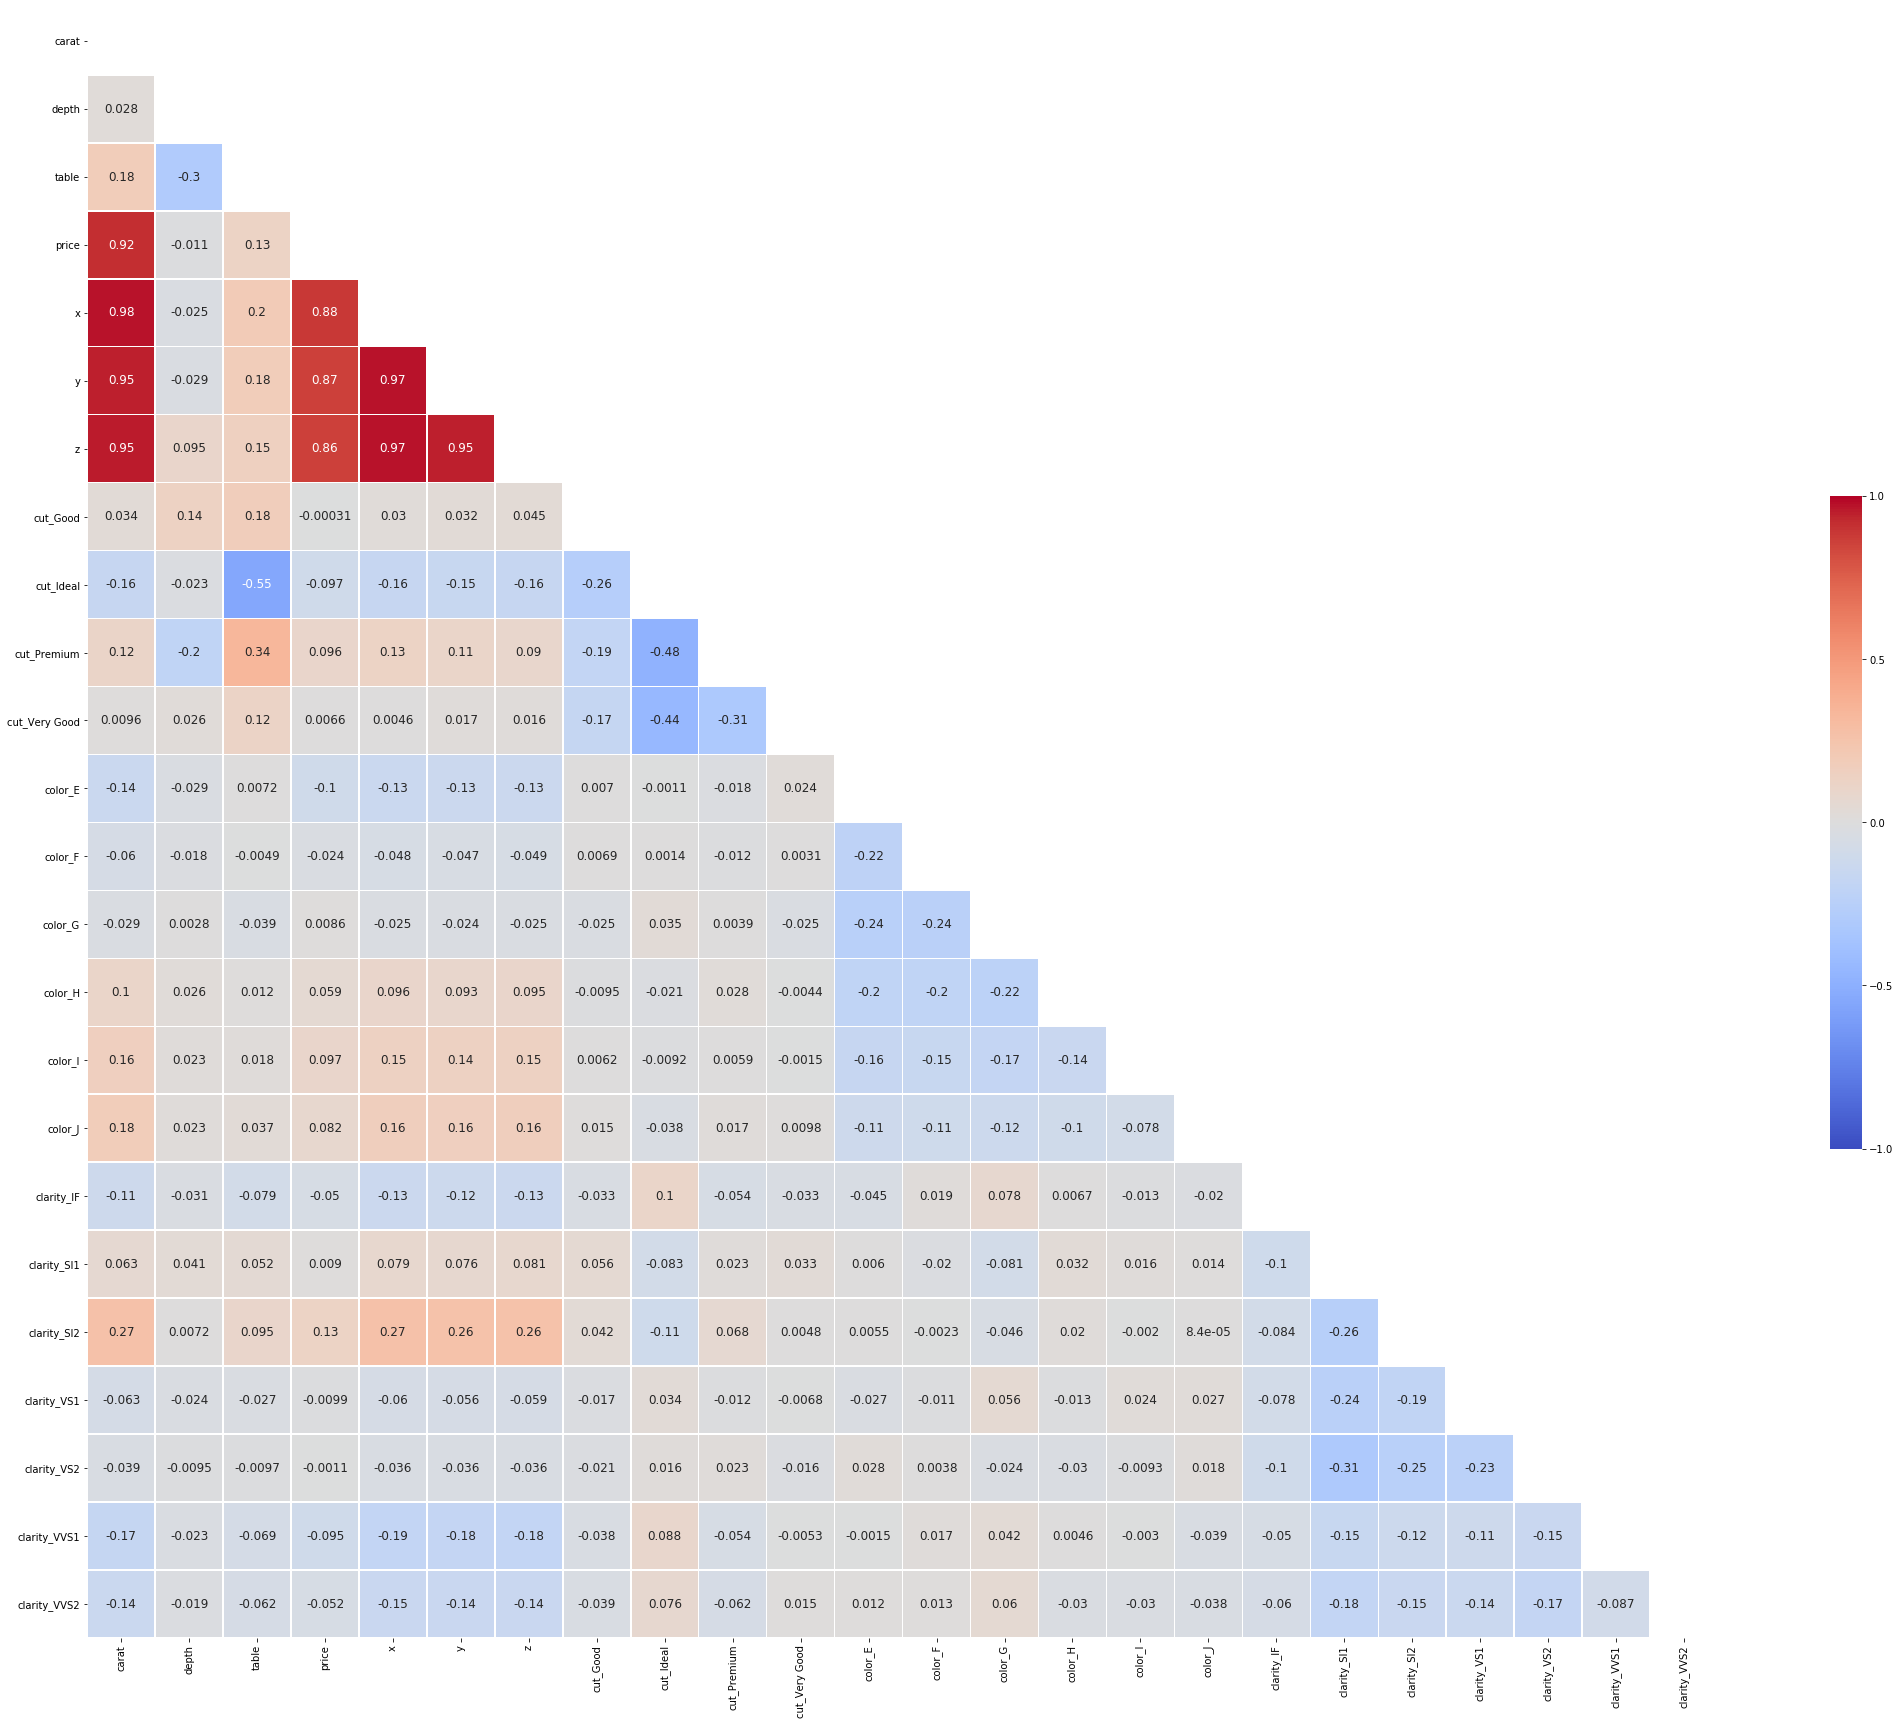

In [41]:
mask = np.zeros_like(datasetnew.corr(), dtype=np.bool)
Triu = np.triu_indices_from(mask)
mask[Triu] = True


f, ax = plt.subplots(figsize=(40, 30)) 
heatmap = sns.heatmap(datasetnew.corr(), 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(datasetnew.columns, rotation = 0)
ax.set_xticklabels(datasetnew.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})